In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
#Authentication - without user

cid = '7379af8fba5e4575afbd0c9f0bd4a344'
secret = '478de4b14e024eb781732d4ddf351675'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=1333723a6eff4b7f"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]

track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [4]:
tracks = []

for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    
    #Track name
    track_name = track["track"]["name"]
    
    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]
    
    #Album
    album = track["track"]["album"]["name"]
    
    #Popularity of the track
    track_pop = track["track"]["popularity"]

    #Release date
    release_date = track["track"]["album"]["release_date"]

    tracks.append((track_uri, track_name, artist_name, artist_pop, artist_genres, album, track_pop, release_date))

In [37]:
#Take every genre from every track and put it in a list
genres = []
for track in tracks:
    genres.append(track[4])

#Split every subgenre in every genre and put it in a list
genres_list = []
for genre in genres:
    for word in genre:
        genres_list.append(word)

#Split every subgenre in every genre and put it in a list
subgenre_list = []
for genre in genres_list:
    L = genre.split()
    for word in L:
        subgenre_list.append(word)

unique_words = list(set(subgenre_list))


In [84]:
word_list = subgenre_list
word_count = {}
for word in word_list:
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1


In [85]:
sorted_word_count = dict(sorted(word_count.items(), key=lambda x: x[1]))

print("Diccionario ordenado por valor (ascendente):")
for word, count in sorted_word_count.items():
    print(f"{word}: {count}")

Diccionario ordenado por valor (ascendente):
alt: 1
deep: 1
kentucky: 1
brooklyn: 1
colombian: 1
garage: 1
permanent: 1
sheffield: 1
art: 1
gen: 1
folk-pop: 1
europop: 1
new: 1
latin: 1
classic: 1
oklahoma: 1
country: 1
folk: 1
stomp: 1
and: 1
holler: 1
alternative: 1
j-division: 1
korean: 1
ost: 1
z: 2
underground: 2
wave: 2
corrido: 2
uk: 2
pov:: 3
k-pop: 3
colombiano: 3
singer-songwriter: 3
hip: 4
hop: 4
corridos: 4
tumbados: 4
modern: 4
contemporary: 5
dance: 5
sad: 6
rap: 6
indie: 6
trap: 6
urbano: 6
rock: 6
r&b: 7
sierreno: 8
canadian: 10
reggaeton: 10
latino: 12
pop: 40


In [86]:

genre_list = []
count_list = []

for word, count in sorted_word_count.items():
    genre_list.append(word)
    count_list.append(count)

count_list.reverse()
genre_list.reverse()

In [87]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'pop'),
  Text(1, 0, 'latino'),
  Text(2, 0, 'reggaeton'),
  Text(3, 0, 'canadian'),
  Text(4, 0, 'sierreno'),
  Text(5, 0, 'r&b'),
  Text(6, 0, 'rock'),
  Text(7, 0, 'urbano'),
  Text(8, 0, 'trap'),
  Text(9, 0, 'indie')])

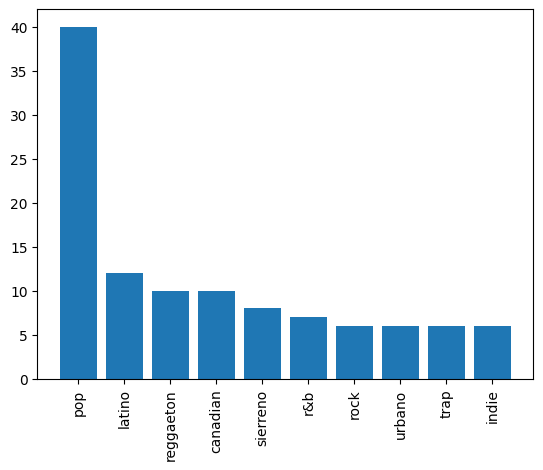

In [88]:
#Make a bar chart with the 10 most common genres
plt.bar(genre_list[:10], count_list[:10])
plt.xticks(rotation='vertical')